In [2]:
import matplotlib.pyplot as plt
import json
import numpy as np

In [3]:
def plot_func(models):
    fig, axs = plt.subplots(2, 1, figsize=(8, 16))

    for x in models:
        m = x[0]
        pool = x[1]
        c = x[2]
        json_names = x[3]
        for p in pool:
            for name in json_names:
                spearman, pearson = [], []
                std_spearman, std_pearson = [], []
                for i in range(c):
                    res = json.load(open(f"../output/{m}/{p}/{i}_to_{i+1}/{name}.json"))

                    std_1 = res["stdev_cosine_spearman_test"]
                    mean_1 = res["mean_cosine_spearman_test"]
                    std_spearman.append((mean_1-std_1, mean_1+std_1))
                    spearman.append(mean_1)

                    std_2 = res["stdev_cosine_pearson_test"]
                    mean_2 = res["mean_cosine_pearson_test"]
                    std_pearson.append((mean_2-std_2, mean_2+std_2))
                    pearson.append(mean_2)

                axs[0].plot(spearman, label=f"{m} {p}")
                if "unsupervised" not in name:
                    axs[0].fill_between(
                        np.array(list(range(c))), 
                        np.array(std_spearman)[:,0], 
                        np.array(std_spearman)[:,1], 
                        alpha=0.15
                    )
                axs[0].set_xlabel("Index of hidden state")
                axs[0].set_ylabel("Spearman correlation coefficient (test set)")
                axs[0].legend()

                axs[1].plot(pearson, label=f"{m} {p}")
                if "unsupervised" not in name:
                    axs[1].fill_between(
                        np.array(list(range(c))), 
                        np.array(std_pearson)[:,0], 
                        np.array(std_pearson)[:,1], 
                        alpha=0.15
                    )
                axs[1].set_xlabel("Index of hidden state")
                axs[1].set_ylabel("Pearson correlation coefficient (test set)")
                axs[1].legend()
                
def plot_func_unsupervised(models):
    fig, axs = plt.subplots(2, 1, figsize=(8, 16))

    for x in models:
        m = x[0]
        pool = x[1]
        c = x[2]
        json_names = x[3]
        for p in pool:
            spearman, pearson = [], []
            spearman_std, pearson_std = [], []
            for name in json_names:
                spearman_tmp, pearson_tmp = [], []
                for i in range(c):
                    res = json.load(open(f"../output/{m}/{p}/{i}_to_{i+1}/{name}.json"))

                    mean_1 = res["mean_cosine_spearman_test"]
                    spearman_tmp.append(mean_1)

                    mean_2 = res["mean_cosine_pearson_test"]
                    pearson_tmp.append(mean_2)
                
                spearman.append(spearman_tmp)
                pearson.append(pearson_tmp)
                
            spearman = np.array(spearman)
            pearson = np.array(pearson)
            
            spearman_mean = spearman.mean(axis=0)
            pearson_mean = pearson.mean(axis=0)
            
            spearman_std = spearman.std(axis=0, ddof=1)
            pearson_std = pearson.std(axis=0, ddof=1)

            axs[0].plot(spearman_mean, label=f"{m} {p}")
            if "unsupervised" in name:
                axs[0].fill_between(
                    np.array(list(range(c))), 
                    spearman_mean - spearman_std,
                    spearman_mean + spearman_std, 
                    alpha=0.15
                )
            axs[0].set_xlabel("Index of hidden state")
            axs[0].set_ylabel("Spearman correlation coefficient (test set)")
            axs[0].legend()

            axs[1].plot(pearson_mean, label=f"{m} {p}")
            if "unsupervised" in name:
                axs[1].fill_between(
                    np.array(list(range(c))), 
                    pearson_mean - pearson_std,
                    pearson_mean + pearson_std, 
                    alpha=0.15
                )
            axs[1].set_xlabel("Index of hidden state")
            axs[1].set_ylabel("Pearson correlation coefficient (test set)")
            axs[1].legend()

# Finetuned

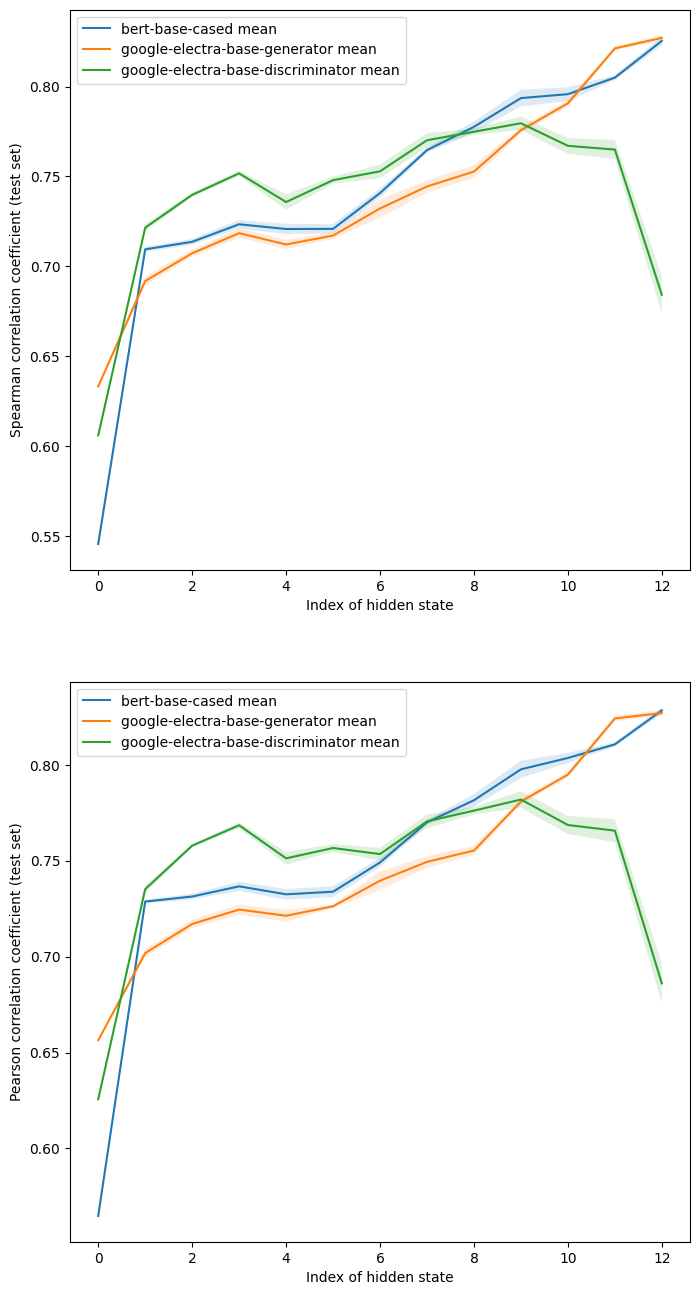

In [4]:
models = [
    ("bert-base-cased", ["mean"], 13, ["test_results"]),
    ("google-electra-base-generator", ["mean"], 13, ["test_results"]),
    ("google-electra-base-discriminator", ["mean"], 13, ["test_results"]),
]

plot_func(models)

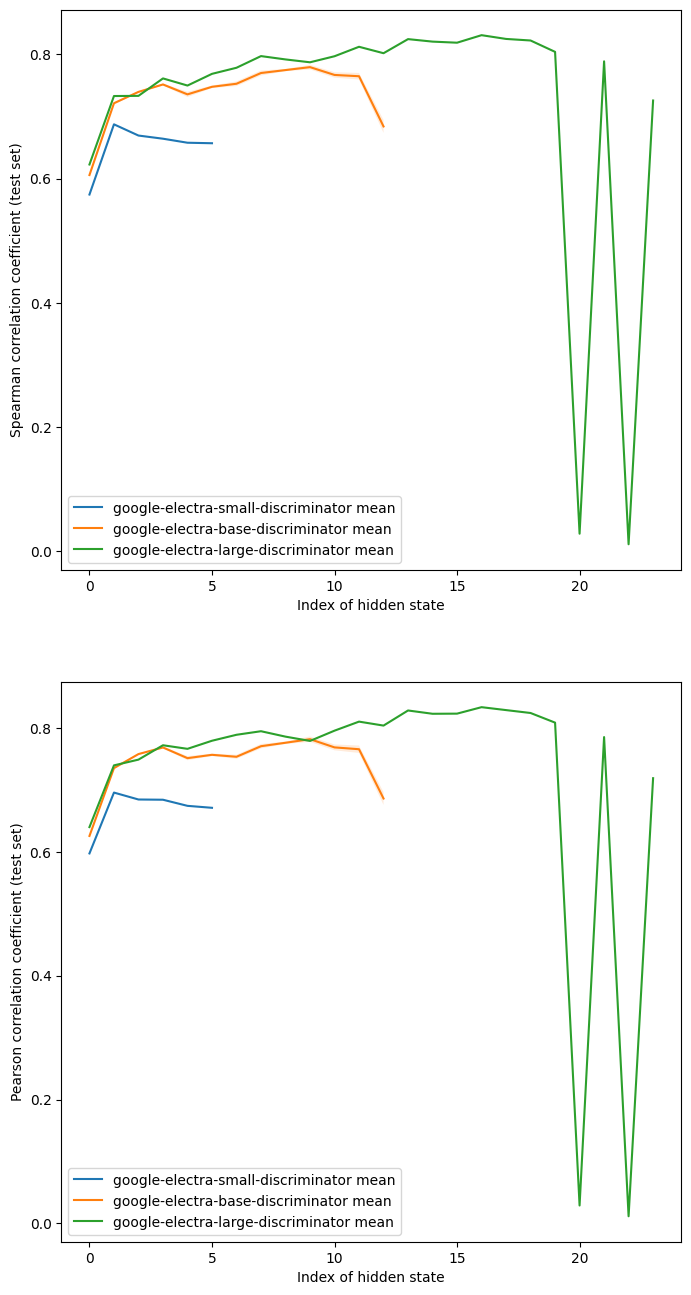

In [5]:
models = [
    ("google-electra-small-discriminator", ["mean"], 6, ["test_results"]),
    ("google-electra-base-discriminator", ["mean"], 13, ["test_results"]),
    ("google-electra-large-discriminator", ["mean"], 24, ["test_results"]),
]

plot_func(models)

# Probing (finetuned last hidden state)

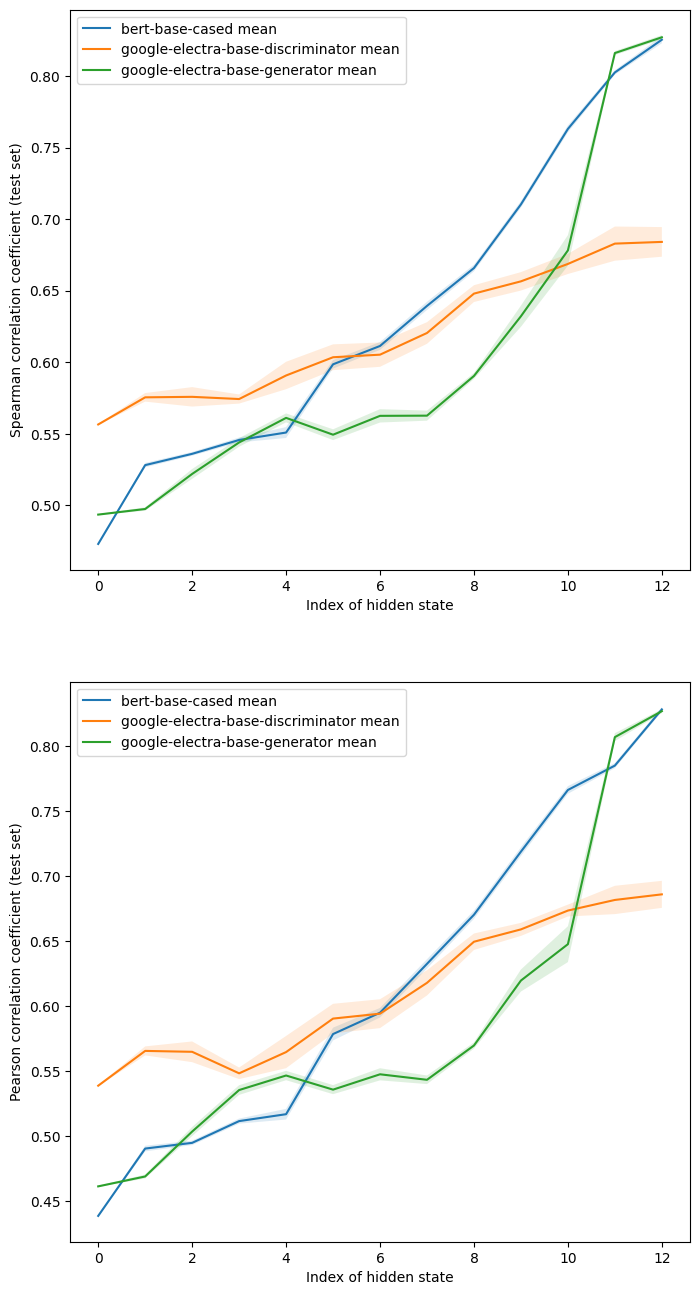

In [6]:
models = [
    ("bert-base-cased", ["mean"], 13, [
        "test_results_unsupervised_model_2024_01_17_17_23",
        "test_results_unsupervised_model_2024_01_17_17_31",
        "test_results_unsupervised_model_2024_01_17_17_39",
        "test_results_unsupervised_model_2024_01_17_17_47",
        "test_results_unsupervised_model_2024_01_17_17_55",
    ]),
    ("google-electra-base-discriminator", ["mean"], 13, [
        "test_results_unsupervised_model_2024_01_17_16_15",
        "test_results_unsupervised_model_2024_01_17_16_23",
        "test_results_unsupervised_model_2024_01_17_16_31",
        "test_results_unsupervised_model_2024_01_17_16_39",
        "test_results_unsupervised_model_2024_01_17_16_47",
    ]),
    ("google-electra-base-generator", ["mean"], 13, [
        "test_results_unsupervised_model_2024_01_17_17_30",
        "test_results_unsupervised_model_2024_01_17_17_32",
        "test_results_unsupervised_model_2024_01_17_17_34",
        "test_results_unsupervised_model_2024_01_17_17_35",
        "test_results_unsupervised_model_2024_01_17_17_37",
    ]),
]

plot_func_unsupervised(models)

# DAPT using MLM, then finetuned

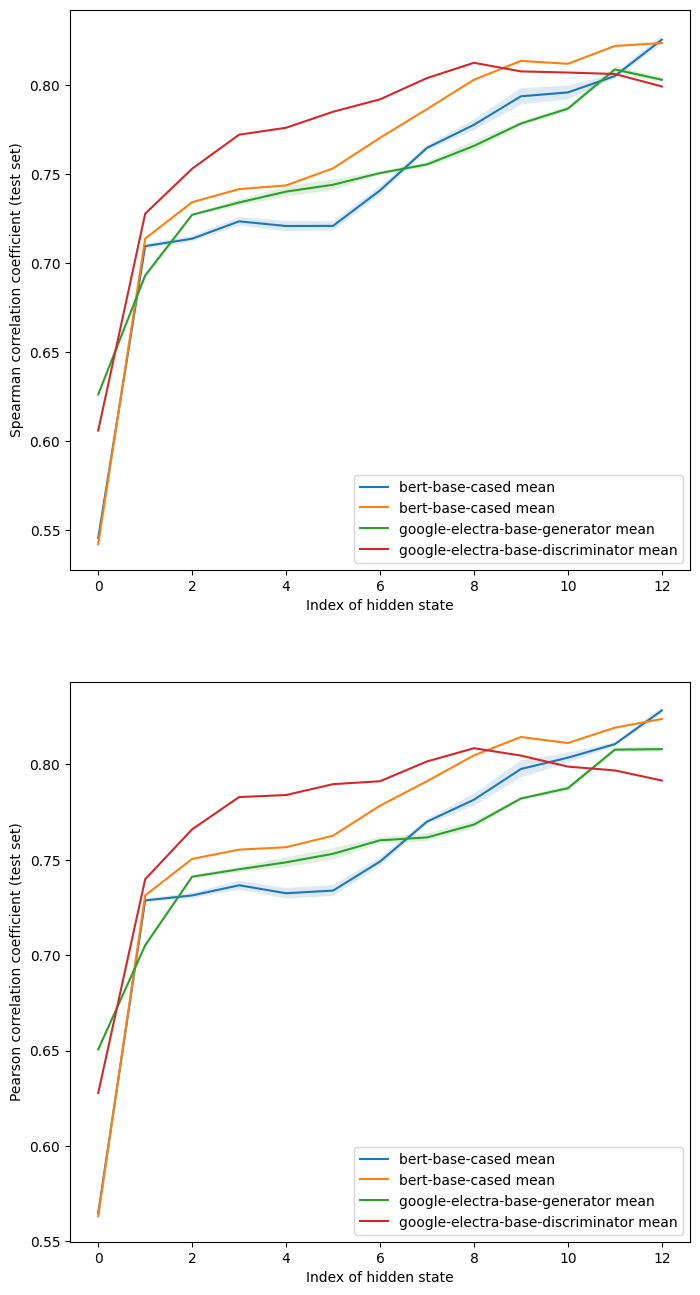

In [7]:
models = [
    ("bert-base-cased", ["mean"], 13, ["test_results", "test_results_bert-base-cased_model_epoch_9_mlm"]),
    ("google-electra-base-generator", ["mean"], 13, ["test_resultsgoogle-electra-base-generator_model_epoch_9_mlm"]),
    ("google-electra-base-discriminator", ["mean"], 13, ["test_results_google-electra-base-discriminator_model_epoch_9_mlm"]),
]

plot_func(models)